# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [16]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from datetime import date
from scipy import stats
from scipy.stats import linregress


# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


## Generate Cities List

In [17]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        


# Print the city count to confirm sufficient count
print(len(cities))

625


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [8]:
cities_num = []
cities_name = []
lat= []
lng= []
temp= []
humidity= []
cloudy= []
wind_speed= []
country= []
date= []
record = 0
set = 1
city_count = 0
url = "http://api.openweathermap.org/data/2.5/weather?"
#query_url = f"{url}appid={weather_api_key}&q="
#&units=imperial


In [9]:
print("Beginning Data Retrieval")
print("-"*64)
for city in cities:      
    query_url = f"{url}appid={weather_api_key}&q={city}&units=imperial"
    weather_response = requests.get(query_url)
    weather_json = weather_response.json()
    #print(query_url+city)
    
    try:
         
        city_id = weather_json["id"]    
        cities_num.append(city_id)

        city_name = weather_json["name"]
        cities_name.append(city_name)

        lat.append(weather_json["coord"]["lat"])

        lng.append(weather_json["coord"]["lon"])        

        temp.append(weather_json["main"]["temp"])

        humidity.append(weather_json["main"]["humidity"])

        cloudy.append(weather_json["clouds"]["all"])

        wind_speed.append(weather_json["wind"]["speed"])

        country.append(weather_json["sys"]["country"])

        date.append(weather_json["dt"])

        if record >49:
            record =0
            set +=1
            city_count +=1
            print("-"*64)

        elif set>1:
            city_count +=1
            print(f"Processing Record {record} of Set {set} | {city_name} ")
            record +=1

        else:
            record +=1
            city_count +=1
            print(f"Processing Record {record} of Set {set} | {city_name} ")




    except:
        
        #print(weather_json["message"])
        print(f"City not found. Skipping...")
        pass
    
print("-"*64)
print("Data Retrieval Complete")
print("-"*64)



Beginning Data Retrieval
----------------------------------------------------------------
Processing Record 1 of Set 1 | Hermanus 
Processing Record 2 of Set 1 | Mount Gambier 
City not found. Skipping...
Processing Record 3 of Set 1 | Smithers 
Processing Record 4 of Set 1 | Padang 
Processing Record 5 of Set 1 | Tuktoyaktuk 
Processing Record 6 of Set 1 | Afuá 
City not found. Skipping...
Processing Record 7 of Set 1 | Lüderitz 
Processing Record 8 of Set 1 | Mossamedes 
Processing Record 9 of Set 1 | Broken Hill 
Processing Record 10 of Set 1 | Rikitea 
Processing Record 11 of Set 1 | Puerto Ayora 
Processing Record 12 of Set 1 | Grindavik 
Processing Record 13 of Set 1 | Coquimbo 
Processing Record 14 of Set 1 | Chokurdakh 
Processing Record 15 of Set 1 | Chadiza 
Processing Record 16 of Set 1 | Souillac 
Processing Record 17 of Set 1 | Nikolskoye 
Processing Record 18 of Set 1 | Dikson 
Processing Record 19 of Set 1 | Khatanga 
Processing Record 20 of Set 1 | Warrington 
Processin

Processing Record 23 of Set 4 | Narsaq 
Processing Record 24 of Set 4 | Lagoa 
Processing Record 25 of Set 4 | Coihueco 
Processing Record 26 of Set 4 | Virginia Beach 
Processing Record 27 of Set 4 | Severo-Kuril'sk 
Processing Record 28 of Set 4 | Morón 
Processing Record 29 of Set 4 | Benguela 
Processing Record 30 of Set 4 | Esso 
City not found. Skipping...
Processing Record 31 of Set 4 | Byron Bay 
Processing Record 32 of Set 4 | Tabas 
Processing Record 33 of Set 4 | Karratha 
Processing Record 34 of Set 4 | Eldorado 
Processing Record 35 of Set 4 | Alofi 
City not found. Skipping...
Processing Record 36 of Set 4 | Seversk 
Processing Record 37 of Set 4 | Hilo 
Processing Record 38 of Set 4 | Pathein 
City not found. Skipping...
Processing Record 39 of Set 4 | Nemuro 
Processing Record 40 of Set 4 | Pudozh 
City not found. Skipping...
Processing Record 41 of Set 4 | Mahabalipuram 
Processing Record 42 of Set 4 | Karlskrona 
Processing Record 43 of Set 4 | Matagami 
Processing Re

Processing Record 0 of Set 8 | Agirish 
Processing Record 1 of Set 8 | Lata 
Processing Record 2 of Set 8 | Howell 
Processing Record 3 of Set 8 | Koratagere 
Processing Record 4 of Set 8 | Saint George 
Processing Record 5 of Set 8 | Lamu 
Processing Record 6 of Set 8 | Keuruu 
City not found. Skipping...
Processing Record 7 of Set 8 | Sirte 
Processing Record 8 of Set 8 | Ordynskoye 
Processing Record 9 of Set 8 | Sal Rei 
Processing Record 10 of Set 8 | Pisco 
Processing Record 11 of Set 8 | Makīnsk 
Processing Record 12 of Set 8 | Waipawa 
Processing Record 13 of Set 8 | Hwange 
Processing Record 14 of Set 8 | Vanimo 
Processing Record 15 of Set 8 | Salinópolis 
Processing Record 16 of Set 8 | Windhoek 
Processing Record 17 of Set 8 | Iwaki 
Processing Record 18 of Set 8 | Meulaboh 
Processing Record 19 of Set 8 | Palmerston North 
Processing Record 20 of Set 8 | Jacareacanga 
Processing Record 21 of Set 8 | Saint Anthony 
City not found. Skipping...
Processing Record 22 of Set 8 |

Processing Record 31 of Set 11 | Clyde River 
Processing Record 32 of Set 11 | Narón 
Processing Record 33 of Set 11 | Grand Gaube 
----------------------------------------------------------------
Data Retrieval Complete
----------------------------------------------------------------


In [10]:
print(len(lng))
print(len(lat))
print(city_count)
print(len(temp))
print(len(humidity))
print(len(cloudy))
print(len(wind_speed))
print(len(country))
print(len(date))    

544
544
544
544
544
544
544
544
544


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [11]:
weather_dict = {
    "City": cities_name,
    "Country":country,
    "Date":date,
    "Lat": lat,
    "Lng": lng,
    "Max Temp": temp,
    "Humidity": humidity,
    "Cloudiness":cloudy,
    "Wind Speed":wind_speed    
}
weather_data = pd.DataFrame(weather_dict)
weather_data.to_csv(output_data_file)
weather_data

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Hermanus,ZA,1630104637,-34.4187,19.2345,41.81,75,82,11.63
1,Mount Gambier,AU,1630104638,-37.8333,140.7667,48.11,61,40,17.27
2,Smithers,CA,1630104639,54.7804,-127.1743,66.52,52,40,4.61
3,Padang,ID,1630104553,-0.9492,100.3543,76.35,88,72,4.05
4,Tuktoyaktuk,CA,1630104553,69.4541,-133.0374,51.80,87,75,6.91
...,...,...,...,...,...,...,...,...,...
539,Fare,PF,1630104848,-16.7000,-151.0167,78.42,76,30,12.50
540,Shenandoah,US,1630104727,30.4013,-91.0009,79.18,91,87,1.01
541,Clyde River,CA,1630104849,70.4692,-68.5914,39.43,93,75,6.91
542,Narón,ES,1630104849,43.5167,-8.1528,61.61,88,0,1.90


In [12]:
weather_data.describe()

,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
count,5.440000e+02,544.000000,544.000000,544.000000,544.000000,544.000000,544.000000
mean,1.630105e+09,20.017132,20.999526,66.420018,73.375000,56.852941,7.737261
std,8.152336e+01,33.507667,89.826654,14.673939,21.089282,38.071084,5.529567
min,1.630104e+09,-54.800000,-179.166700,35.470000,9.000000,0.000000,0.000000
25%,1.630105e+09,-6.822150,-57.606325,54.735000,62.750000,20.000000,3.440000
50%,1.630105e+09,23.028800,24.715700,68.405000,79.000000,68.000000,6.210000
75%,1.630105e+09,49.779350,100.340125,77.600000,89.000000,95.000000,10.977500
max,1.630105e+09,78.218600,179.316700,110.750000,100.000000,100.000000,31.360000


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [13]:
weather_data.loc[weather_data["Humidity"] >100,:]

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed


In [ ]:
#  Get the indices of cities that have humidity over 100%.


In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

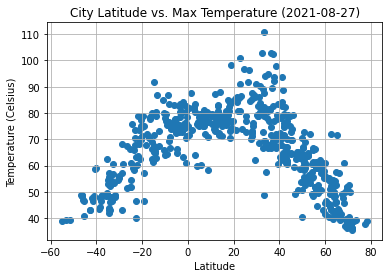

In [18]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Max Temp"], marker="o")
today =date.today()
# Incorporate the other graph properties
plt.title(f"City Latitude vs. Max Temperature ({today})")
plt.ylabel("Temperature (Celsius)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Temperature.png")

# Show plot
plt.show()

## Latitude vs. Humidity Plot

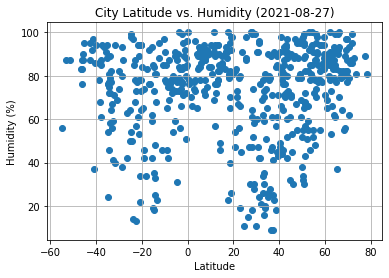

In [19]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Humidity"], marker="o")
today =date.today()
# Incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity ({today})")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Humidity.png")

# Show plot
plt.show()

## Latitude vs. Cloudiness Plot

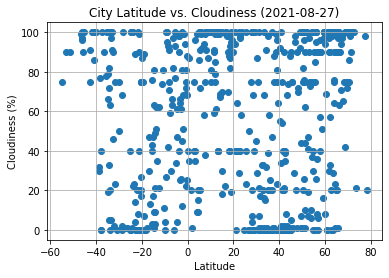

In [20]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Cloudiness"], marker="o")
today =date.today()
# Incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness ({today})")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Cloudiness.png")

# Show plot
plt.show()

## Latitude vs. Wind Speed Plot

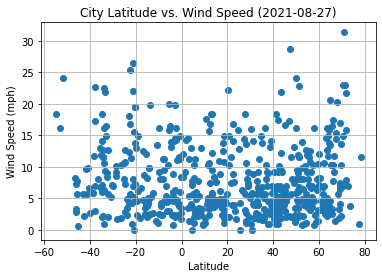

In [21]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Wind Speed"], marker="o")
today =date.today()
# Incorporate the other graph properties
plt.title(f"City Latitude vs. Wind Speed ({today})")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("WindSpeed.png")

# Show plot
plt.show()

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [22]:
hem_n_df = weather_data.loc[weather_data['Lat'] >= 0,:]
x_values_n = hem_n_df["Lat"]
y_temp_n = hem_n_df['Max Temp']
 
# Perform a linear regression on Max Temperature vs. latitude
(slope_temp_n, intercept_temp_n, rvalue_temp_n, pvalue, stderr) = stats.linregress(x_values_n, y_temp_n)

# Get regression values
regress_values_tempn = x_values_n * slope_temp_n + intercept_temp_n
#print(regress_values_tempn)
line_eq_n = "y = " + str(round(slope_temp_n,2)) + "x +" + str(round(intercept_temp_n,2))

The r value is: -0.7479240122371423


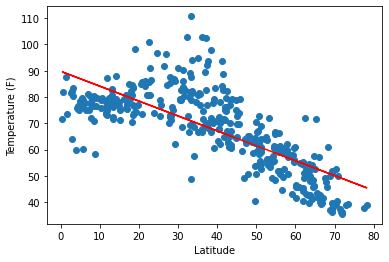

In [23]:
plt.scatter(x_values_n,y_temp_n)
plt.plot(x_values_n,regress_values_tempn,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.annotate(line_eq_n,(20,275),fontsize=15,color="red")

# Print r value
print(f"The r value is: {rvalue_temp_n}")

# Show plot
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

In [24]:
hem_s_df = weather_data.loc[weather_data['Lat'] < 0,:]
x_values_s = hem_s_df["Lat"]
y_temp_s = hem_s_df['Max Temp']
# Perform a linear regression on Max Temperature vs. latitude
(slope_temp_s, intercept_temp_s, rvalue_temp_s, pvalue, stderr) = stats.linregress(x_values_s, y_temp_s)

# Get regression values
regress_values_temps = x_values_s * slope_temp_s + intercept_temp_s
#print(regress_values_temps)
line_eq_s = "y = " + str(round(slope_temp_s,2)) + "x +" + str(round(intercept_temp_s,2))

The r value is: 0.8318275446576147


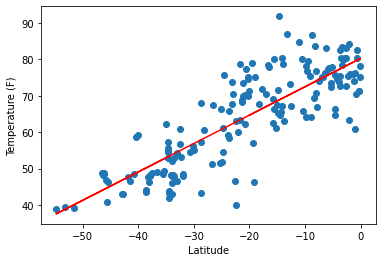

In [25]:
plt.scatter(x_values_s,y_temp_s)
plt.plot(x_values_s,regress_values_temps,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.annotate(line_eq_s,(-30,275),fontsize=15,color="red")

# Print r value
print(f"The r value is: {rvalue_temp_s}")

# Show plot
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [26]:
#hem_n_df = weather_data.loc[weather_data['Lat'] >= 0,:]
#x_values_n = hem_n_df["Lat"]
y_humid_n = hem_n_df['Humidity']
 
# Perform a linear regression on Max Temperature vs. latitude
(slope_humid_n, intercept_humid_n, rvalue_humid_n, pvalue, stderr) = stats.linregress(x_values_n, y_humid_n)

# Get regression values
regress_values_humidn = x_values_n * slope_humid_n + intercept_humid_n
#print(regress_values_humidn)
line_eq_n = "y = " + str(round(slope_humid_n,2)) + "x +" + str(round(intercept_humid_n,2))

The r value is: 0.07417925028790383


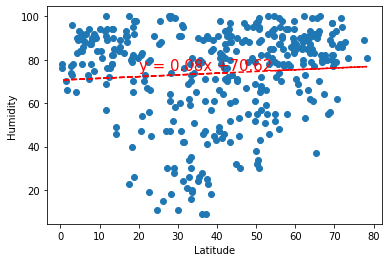

In [27]:
plt.scatter(x_values_n,y_humid_n)
plt.plot(x_values_n,regress_values_humidn,"r--")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.annotate(line_eq_n,(20,75),fontsize=15,color="red")

# Print r value
print(f"The r value is: {rvalue_humid_n}")
# Show plot
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [28]:
#hem_s_df = weather_data.loc[weather_data['Lat'] < 0,:]
#x_values_s = hem_s_df["Lat"]
y_humid_s = hem_s_df['Humidity']
# Perform a linear regression on Max Temperature vs. latitude
(slope_humid_s, intercept_humid_s, rvalue_humid_s, pvalue, stderr) = stats.linregress(x_values_s, y_humid_s)

# Get regression values
regress_values_humids = x_values_s * slope_humid_s + intercept_humid_s
#print(regress_values_humids)
line_eq_s = "y = " + str(round(slope_humid_s,2)) + "x +" + str(round(intercept_humid_s,2))

The r value is: -0.016660771702435143


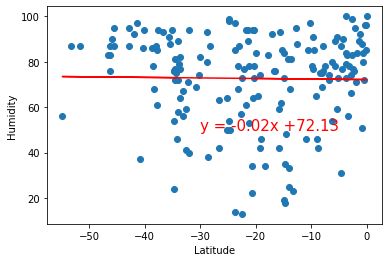

In [29]:
plt.scatter(x_values_s,y_humid_s)
plt.plot(x_values_s,regress_values_humids,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.annotate(line_eq_s,(-30,50),fontsize=15,color="red")

# Print r value
print(f"The r value is: {rvalue_humid_s}")

# Show plot
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [30]:
#hem_n_df = weather_data.loc[weather_data['Lat'] >= 0,:]
#x_values_n = hem_n_df["Lat"]
y_cloud_n = hem_n_df['Cloudiness']
 
# Perform a linear regression on Max Temperature vs. latitude
(slope_cloud_n, intercept_cloud_n, rvalue_cloud_n, pvalue, stderr) = stats.linregress(x_values_n, y_cloud_n)

# Get regression values
regress_values_cloudn = x_values_n * slope_cloud_n + intercept_cloud_n
#print(regress_values_cloudn)
line_eq_n = "y = " + str(round(slope_cloud_n,2)) + "x +" + str(round(intercept_cloud_n,2))

The r value is: 0.014242132625525778


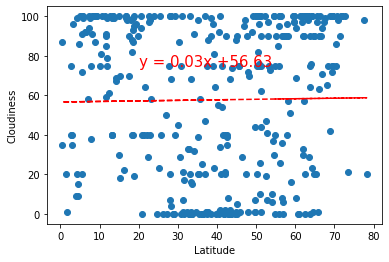

In [31]:
plt.scatter(x_values_n,y_cloud_n)
plt.plot(x_values_n,regress_values_cloudn,"r--")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.annotate(line_eq_n,(20,75),fontsize=15,color="red")

# Print r value
print(f"The r value is: {rvalue_cloud_n}")
# Show plot
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [32]:
#hem_s_df = weather_data.loc[weather_data['Lat'] < 0,:]
#x_values_s = hem_s_df["Lat"]
y_cloud_s = hem_s_df['Cloudiness']
# Perform a linear regression on Max Temperature vs. latitude
(slope_cloud_s, intercept_cloud_s, rvalue_cloud_s, pvalue, stderr) = stats.linregress(x_values_s, y_cloud_s)

# Get regression values
regress_values_clouds = x_values_s * slope_cloud_s + intercept_cloud_s
#print(regress_values_clouds)
line_eq_s = "y = " + str(round(slope_cloud_s,2)) + "x +" + str(round(intercept_cloud_s,2))


The r value is: -0.11878572191508811


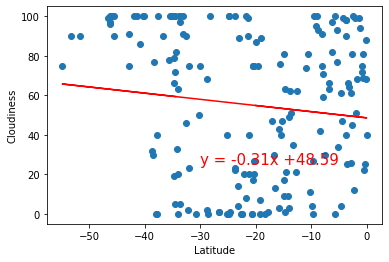

In [33]:
plt.scatter(x_values_s,y_cloud_s)
plt.plot(x_values_s,regress_values_clouds,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.annotate(line_eq_s,(-30,25),fontsize=15,color="red")

# Print r value
print(f"The r value is: {rvalue_cloud_s}")

# Show plot
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [34]:
#hem_n_df = weather_data.loc[weather_data['Lat'] >= 0,:]
#x_values_n = hem_n_df["Lat"]
y_wind_n = hem_n_df['Wind Speed']
 
# Perform a linear regression on Max Temperature vs. latitude
(slope_wind_n, intercept_wind_n, rvalue_wind_n, pvalue, stderr) = stats.linregress(x_values_n, y_wind_n)

# Get regression values
regress_values_windn = x_values_n * slope_wind_n + intercept_wind_n
#print(regress_values_windn)
line_eq_n = "y = " + str(round(slope_wind_n,2)) + "x +" + str(round(intercept_wind_n,2))


The r value is: 0.1436515642611411


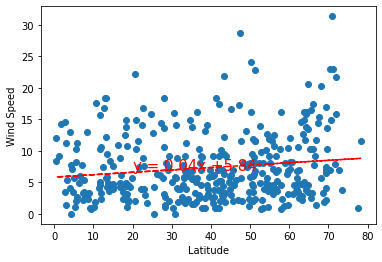

In [35]:
plt.scatter(x_values_n,y_wind_n)
plt.plot(x_values_n,regress_values_windn,"r--")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.annotate(line_eq_n,(20,7),fontsize=15,color="red")

# Print r value
print(f"The r value is: {rvalue_wind_n}")
# Show plot
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [36]:
#hem_s_df = weather_data.loc[weather_data['Lat'] < 0,:]
#x_values_s = hem_s_df["Lat"]
y_wind_s = hem_s_df['Wind Speed']
# Perform a linear regression on Max Temperature vs. latitude
(slope_wind_s, intercept_wind_s, rvalue_wind_s, pvalue, stderr) = stats.linregress(x_values_s, y_wind_s)

# Get regression values
regress_values_winds = x_values_s * slope_wind_s + intercept_wind_s
#print(regress_values_winds)
line_eq_s = "y = " + str(round(slope_wind_s,2)) + "x +" + str(round(intercept_wind_s,2))

The r value is: -0.1329661623396749


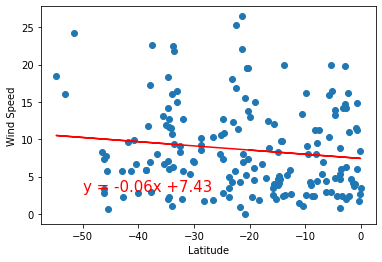

In [37]:
plt.scatter(x_values_s,y_wind_s)
plt.plot(x_values_s,regress_values_winds,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.annotate(line_eq_s,(-50,3),fontsize=15,color="red")

# Print r value
print(f"The r value is: {rvalue_wind_s}")

# Show plot
plt.show()